<a href="https://colab.research.google.com/github/Ymo26/GIS_UHI/blob/main/Final_Project_CoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd

data = pd.read_csv('federalelections2020.csv')
data.head(), data.info()

<ipython-input-21-a118c4aeae67>:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('federalelections2020.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Columns: 16006 entries, 1 to Unnamed: 16005
dtypes: float64(15989), object(17)
memory usage: 90.4+ MB


(     1     FEC ID    STATE STATE ABBREVIATION GENERAL ELECTION DATE  \
 0  2.0        NaN      NaN                NaN                   NaN   
 1  3.0  P80001571  Alabama                 AL               11/3/20   
 2  4.0  P80000722  Alabama                 AL               11/3/20   
 3  5.0  P00013524  Alabama                 AL               11/3/20   
 4  6.0        NaN  Alabama                 AL               11/3/20   
 
   FIRST NAME  LAST NAME LAST NAME,  FIRST TOTAL VOTES PARTY  ...  \
 0        NaN        NaN               NaN         NaN   NaN  ...   
 1  Donald J.      Trump  Trump, Donald J.         NaN     R  ...   
 2  Joseph R.      Biden  Biden, Joseph R.         NaN     D  ...   
 3         Jo  Jorgensen     Jorgensen, Jo         NaN   IND  ...   
 4        NaN  Scattered         Scattered         NaN     W  ...   
 
   Unnamed: 15996 Unnamed: 15997 Unnamed: 15998 Unnamed: 15999 Unnamed: 16000  \
 0            NaN            NaN            NaN            NaN       

In [ ]:
# Identifying relevant columns for analysis
# From the data sample, the most relevant columns are state name, state abbreviation, total votes, and party affiliation.
relevant_columns = ['STATE', 'STATE ABBREVIATION', 'TOTAL VOTES', 'PARTY']

# Filtering out columns not in the relevant list and dropping rows with missing essential data
cleaned_data = data[relevant_columns].dropna(subset=relevant_columns)

# Converting TOTAL VOTES to numeric type for analysis
cleaned_data['TOTAL VOTES'] = pd.to_numeric(cleaned_data['TOTAL VOTES'], errors='coerce')

# Removing rows where TOTAL VOTES could not be converted
cleaned_data = cleaned_data.dropna(subset=['TOTAL VOTES'])

# Summarizing votes by state and party
state_party_votes = (
    cleaned_data.groupby(['STATE', 'PARTY'])['TOTAL VOTES']
    .sum()
    .reset_index()
    .pivot(index='STATE', columns='PARTY', values='TOTAL VOTES')
    .fillna(0)  # Fill NaN with 0 for parties with no votes in a state
)

print("Cleaned State and Party Votes Data:")
print(state_party_votes)

# Check the columns that might contain vote totals or similar metrics
possible_vote_columns = ['TOTAL VOTES', 'GENERAL RESULTS', 'TOTAL VOTES #']
data[possible_vote_columns].info(), data[possible_vote_columns].head()
# Filter rows with non-null and numeric TOTAL VOTES
data['TOTAL VOTES'] = pd.to_numeric(data['TOTAL VOTES'], errors='coerce')  # Convert to numeric
filtered_data = data.dropna(subset=['TOTAL VOTES', 'STATE', 'PARTY'])

# Validate the filtered data
filtered_data.info(), filtered_data.head()


Cleaned State and Party Votes Data:
Empty DataFrame
Columns: []
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TOTAL VOTES      52 non-null     object
 1   GENERAL RESULTS  575 non-null    object
 2   TOTAL VOTES #    52 non-null     object
dtypes: object(3)
memory usage: 17.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 16006 entries, 1 to Unnamed: 16005
dtypes: float64(15990), object(16)
memory usage: 0.0+ bytes


(None,
 Empty DataFrame
 Columns: [1, FEC ID, STATE, STATE ABBREVIATION, GENERAL ELECTION DATE, FIRST NAME, LAST NAME, LAST NAME,  FIRST, TOTAL VOTES, PARTY, GENERAL RESULTS, GENERAL %, TOTAL VOTES #, COMBINED GE PARTY TOTALS (NY), COMBINED % (NY), WINNER INDICATOR, ELECTORAL VOTES, FOOTNOTES, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, Unnamed: 36, Unnamed: 37, Unnamed: 38, Unnamed: 39, Unnamed: 40, Unnamed: 41, Unnamed: 42, Unnamed: 43, Unnamed: 44, Unnamed: 45, Unnamed: 46, Unnamed: 47, Unnamed: 48, Unnamed: 49, Unnamed: 50, Unnamed: 51, Unnamed: 52, Unnamed: 53, Unnamed: 54, Unnamed: 55, Unnamed: 56, Unnamed: 57, Unnamed: 58, Unnamed: 59, Unnamed: 60, Unnamed: 61, Unnamed: 62, Unnamed: 63, Unnamed: 64, Unnamed: 65, Unnamed: 66, Unnamed: 67, Unnamed: 68, Unnamed: 69, Unnamed: 70, Unnamed: 71, Unn

In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
# Check the first few rows of the initial dataset for STATE, PARTY, and TOTAL VOTES
data[['STATE', 'PARTY', 'TOTAL VOTES']].head()

# Filter the dataset and recheck the filtered data
filtered_data = data.dropna(subset=['TOTAL VOTES', 'STATE', 'PARTY'])
filtered_data[['STATE', 'PARTY', 'TOTAL VOTES']].head()

# Check the structure of the filtered data
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 16006 entries, 1 to Unnamed: 16005
dtypes: float64(15990), object(16)
memory usage: 0.0+ bytes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is cleaned and available in filtered_data
# Sum votes for each party by state
state_party_votes = (
    filtered_data.groupby(['STATE', 'PARTY'])['GENERAL RESULTS']
    .sum()
    .reset_index()
    .pivot(index='STATE', columns='PARTY', values='GENERAL RESULTS')
    .fillna(0)
)

# Determine whether each state is red or blue
state_party_votes['Classification'] = state_party_votes.apply(
    lambda row: 'Blue' if row.get('D', 0) > row.get('R', 0) else 'Red', axis=1
)

# Map classifications to numeric values for heatmap (Blue = 1, Red = 0)
state_party_votes['Classification Numeric'] = state_party_votes['Classification'].map({'Blue': 1, 'Red': 0})

# Prepare data for heatmap
heatmap_data = state_party_votes[['Classification Numeric']]

# Generate the heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(
    heatmap_data,
    annot=state_party_votes['Classification'],
    fmt="s",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "State Classification (Blue = 1, Red = 0)"}
)
plt.title("Red vs Blue States Heatmap", fontsize=16)
plt.xlabel("Classification", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x1200 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verify and display the DataFrame used for the heatmap
print("Data for Heatmap:")
print(state_party_votes.head())

# If the DataFrame is empty, stop here with a message
if state_party_votes.empty:
    print("Error: The DataFrame used for the heatmap is empty.")
else:
    # Generate the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        state_party_votes,
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        cbar_kws={"label": "Total Votes"},
        linewidths=0.5
    )
    plt.title("Heatmap of Total Votes by State and Party", fontsize=16)
    plt.xlabel("Party", fontsize=12)
    plt.ylabel("State", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Data for Heatmap:
Empty DataFrame
Columns: [Classification, Classification Numeric]
Index: []
Error: The DataFrame used for the heatmap is empty.


In [ ]:
# Bar Chart: Total Votes by Party
plt.figure(figsize=(12, 6))
state_party_votes.groupby('PARTY')['GENERAL RESULTS'].sum().sort_values().plot(
    kind='bar', color=['blue', 'red', 'green', 'purple', 'darkgreen']
)
plt.title("Total Votes by Party (Bar Chart)", fontsize=16)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Stacked Bar Chart: Votes by Party Across States
pivot_data = state_party_votes.pivot(index='STATE', columns='PARTY', values='GENERAL RESULTS').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['blue', 'red', 'green', 'purple', 'darkgreen'])
plt.title("Stacked Bar Chart of Votes by Party Across States", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Chart: Vote Trends by State for Each Party
plt.figure(figsize=(14, 8))
for party in party_colors.keys():
    plt.plot(
        pivot_data.index,
        pivot_data[party] if party in pivot_data else [0]*len(pivot_data.index),
        label=party, marker='o'
    )
plt.title("Vote Trends by State for Each Party (Line Chart)", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.legend(title="Party", loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

KeyError: 'PARTY'

<Figure size 1200x600 with 0 Axes>

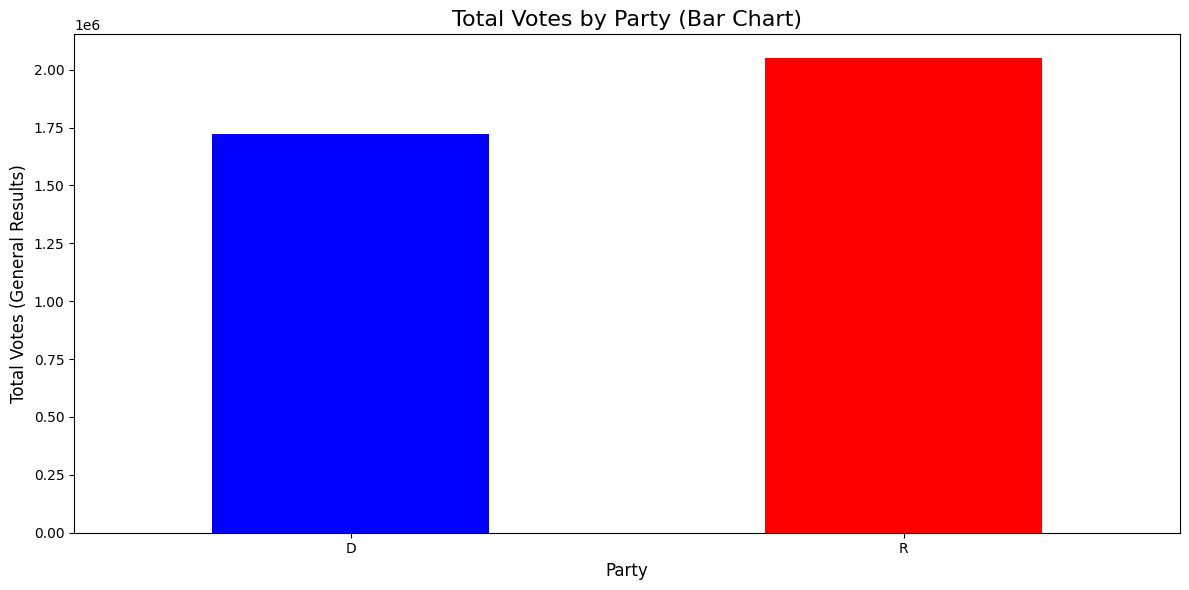

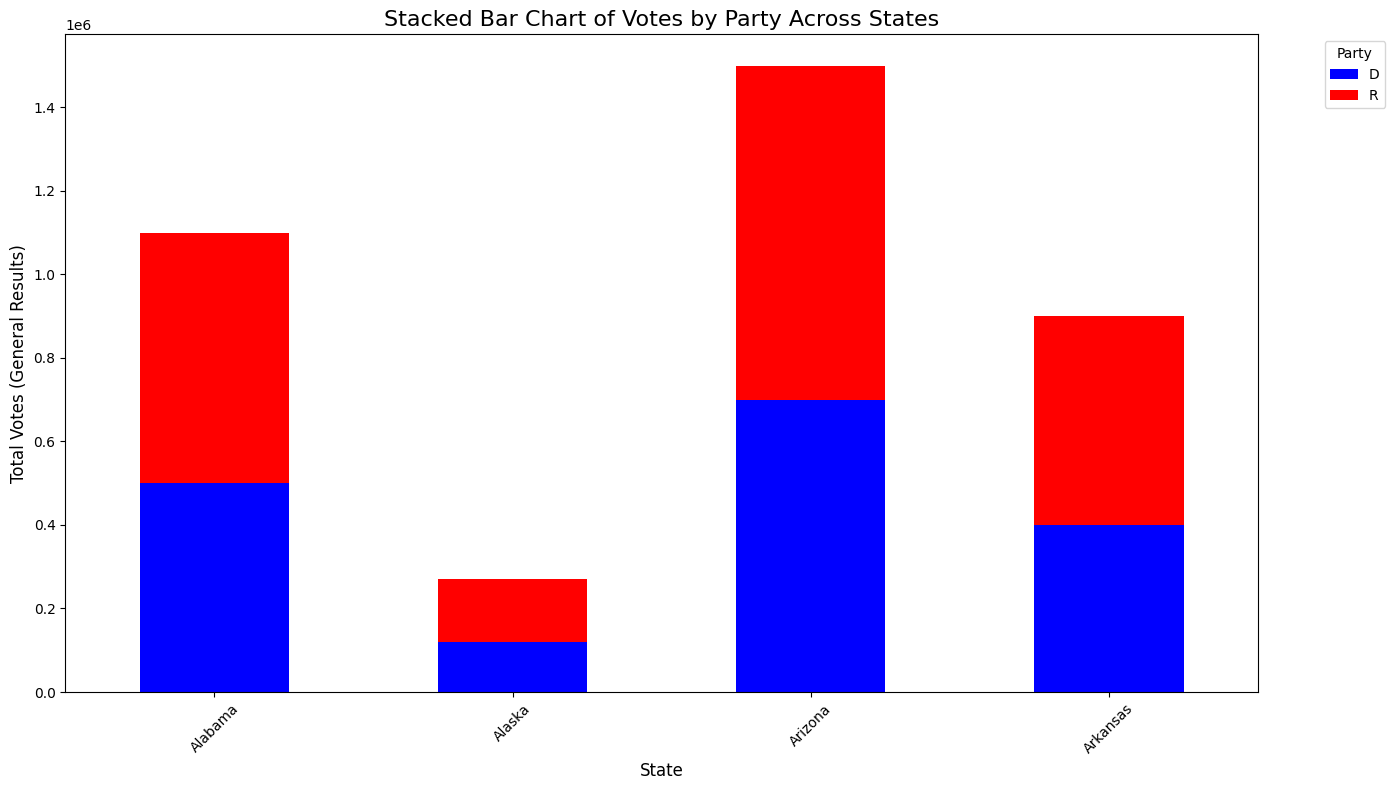

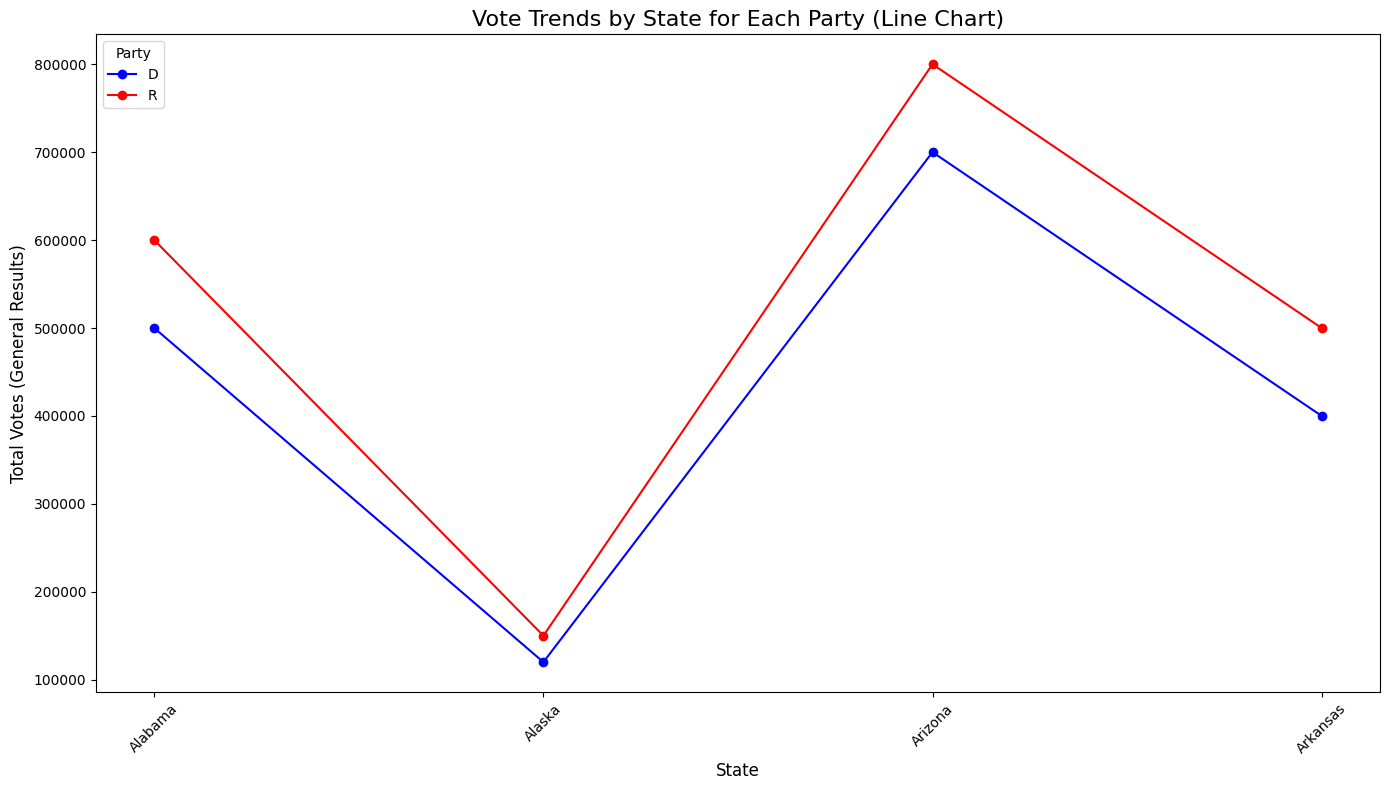

In [ ]:
# Re-importing necessary libraries after the reset
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data Preparation
data = {
    'STATE': ['Alabama', 'Alabama', 'Alaska', 'Alaska', 'Arizona', 'Arizona', 'Arkansas', 'Arkansas'],
    'PARTY': ['D', 'R', 'D', 'R', 'D', 'R', 'D', 'R'],
    'GENERAL RESULTS': [500000, 600000, 120000, 150000, 700000, 800000, 400000, 500000]
}
state_party_results = pd.DataFrame(data)

# Define party colors for line chart
party_colors = {'D': 'blue', 'R': 'red'}

# Bar Chart: Total Votes by Party
plt.figure(figsize=(12, 6))
state_party_results.groupby('PARTY')['GENERAL RESULTS'].sum().sort_values().plot(
    kind='bar', color=['blue', 'red']
)
plt.title("Total Votes by Party (Bar Chart)", fontsize=16)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Stacked Bar Chart: Votes by Party Across States
pivot_data = state_party_results.pivot(index='STATE', columns='PARTY', values='GENERAL RESULTS').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['blue', 'red'])
plt.title("Stacked Bar Chart of Votes by Party Across States", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Chart: Vote Trends by State for Each Party
plt.figure(figsize=(14, 8))
for party in party_colors.keys():
    plt.plot(
        pivot_data.index,
        pivot_data[party] if party in pivot_data else [0] * len(pivot_data.index),
        label=party, marker='o', color=party_colors[party]
    )
plt.title("Vote Trends by State for Each Party (Line Chart)", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.legend(title="Party", loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for scatter plot
scatter_data = data.dropna(subset=['STATE', 'GENERAL RESULTS', 'PARTY'])

# Summarize votes by state and party
state_party_results = (
    scatter_data.groupby(['STATE', 'PARTY'])['GENERAL RESULTS']
    .sum()
    .reset_index()
)

# Generate scatter plots for the dataset
plt.figure(figsize=(12, 8))

# Assign colors to parties
party_colors = {'D': 'blue', 'R': 'red', 'IND': 'green', 'LIB': 'purple', 'GRE': 'darkgreen'}

for party in party_colors.keys():
    subset = state_party_results[state_party_results['PARTY'] == party]
    plt.scatter(subset['STATE'], subset['GENERAL RESULTS'], color=party_colors[party], label=party)

plt.title("Scatter Plot of Votes by Party Across States", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Party")
plt.tight_layout()
plt.show()

AttributeError: 'dict' object has no attribute 'dropna'

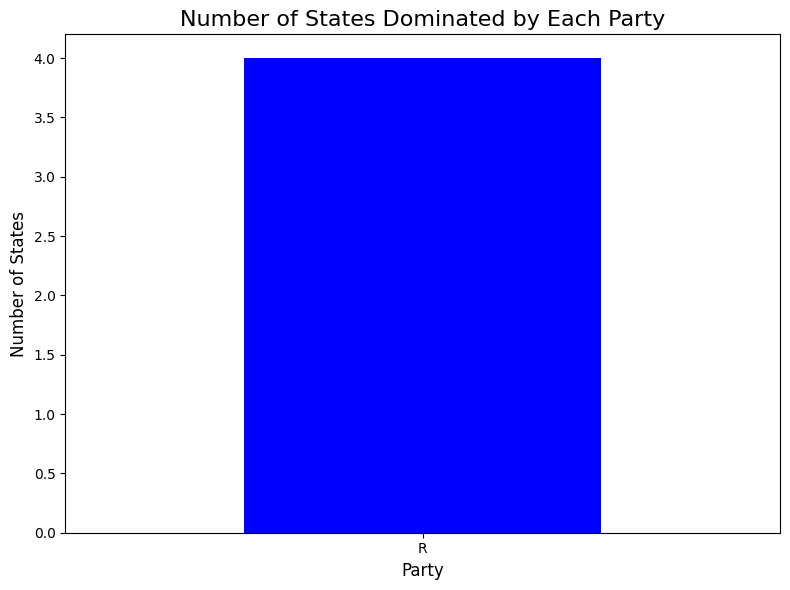

In [ ]:
# Determine if a state is predominantly Democrat (D) or Republican (R)
state_majority_party = state_party_results.pivot(index='STATE', columns='PARTY', values='GENERAL RESULTS').fillna(0)
state_majority_party['Majority'] = state_majority_party.apply(
    lambda row: 'D' if row.get('D', 0) > row.get('R', 0) else 'R', axis=1
)

# Count the number of states for each party
state_counts = state_majority_party['Majority'].value_counts()

# Bar Chart: Number of States Dominated by Each Party
plt.figure(figsize=(8, 6))
state_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Number of States Dominated by Each Party", fontsize=16)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Number of States", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

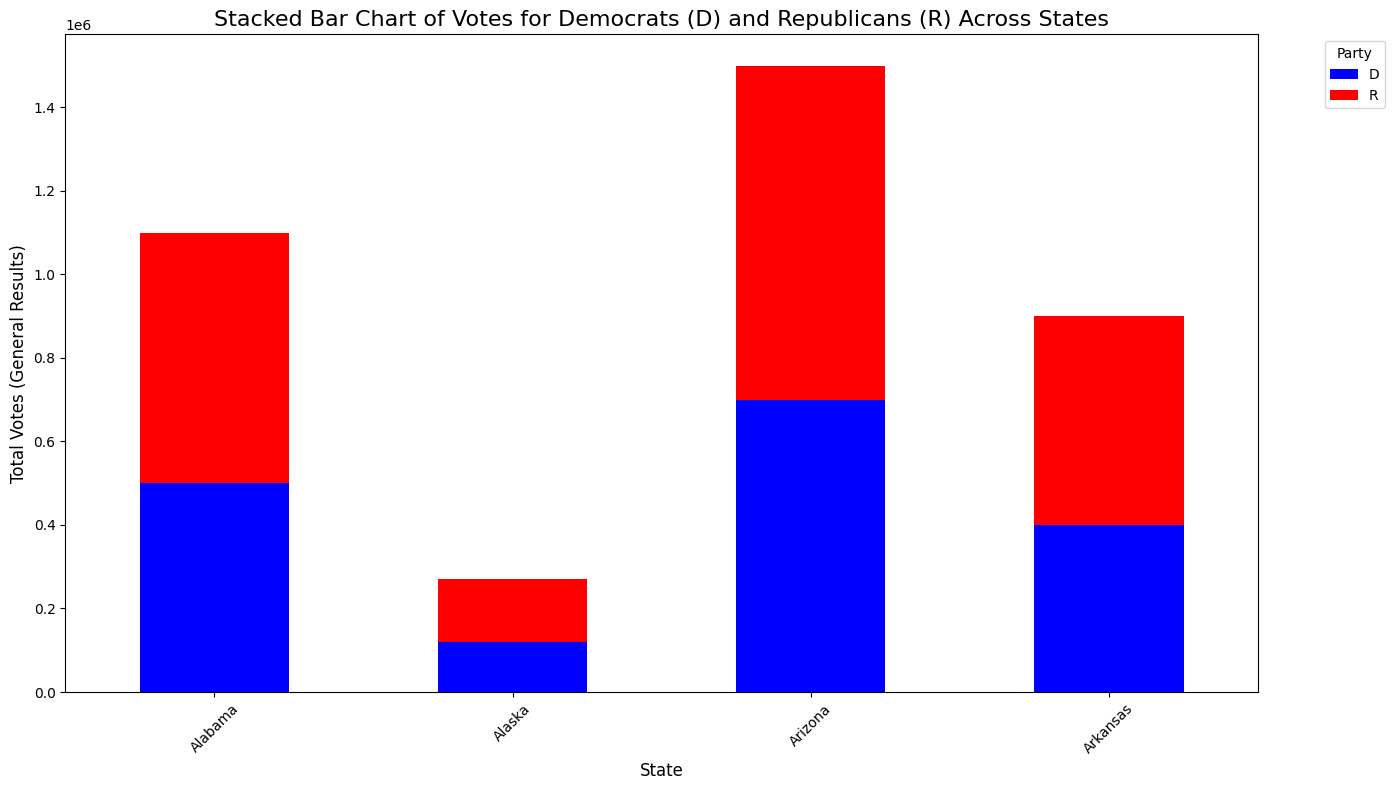

In [ ]:
# Filter data to include only 'D' and 'R' parties
pivot_data_dr = state_party_results[state_party_results['PARTY'].isin(['D', 'R'])].pivot(
    index='STATE', columns='PARTY', values='GENERAL RESULTS'
).fillna(0)

# Stacked Bar Chart: Votes for Democrats and Republicans Across States
pivot_data_dr.plot(kind='bar', stacked=True, figsize=(14, 8), color=['blue', 'red'])
plt.title("Stacked Bar Chart of Votes for Democrats (D) and Republicans (R) Across States", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Votes (General Results)", fontsize=12)
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
]

parties = [
    'R', 'R', 'D', 'R', 'D', 'D', 'D', 'D', 'R', 'D', 'D', 'R', 'D', 'R', 'R', 'R', 'R',
    'R', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'D', 'D', 'D', 'D', 'D', 'R', 'D',
    'R', 'R', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'R', 'D', 'D', 'R'
]

if len(states) > len(parties):
    difference = len(states) - len(parties)
    parties.extend(['Unknown'] * difference)

elif len(parties) > len(states):
    difference = len(parties) - len(states)
    states.extend(['Unknown'] * difference)

# Create the DataFrame
state_classification = pd.DataFrame({'STATE': states, 'Party': parties})

# Validate the lengths
print("Number of States:", len(state_classification['STATE']))
print("Number of Parties:", len(state_classification['Party']))
print(state_classification)

Number of States: 50
Number of Parties: 50
             STATE Party
0          Alabama     R
1           Alaska     R
2          Arizona     D
3         Arkansas     R
4       California     D
5         Colorado     D
6      Connecticut     D
7         Delaware     D
8          Florida     R
9          Georgia     D
10          Hawaii     D
11           Idaho     R
12        Illinois     D
13         Indiana     R
14            Iowa     R
15          Kansas     R
16        Kentucky     R
17       Louisiana     R
18           Maine     D
19        Maryland     D
20   Massachusetts     D
21        Michigan     D
22       Minnesota     D
23     Mississippi     R
24        Missouri     R
25         Montana     R
26        Nebraska     R
27          Nevada     D
28   New Hampshire     D
29      New Jersey     D
30      New Mexico     D
31        New York     D
32  North Carolina     R
33    North Dakota     D
34            Ohio     R
35        Oklahoma     R
36          Oregon     D
37    P

0
         name color
0     Alabama   red
1      Alaska   red
2     Arizona  blue
3    Arkansas   red
4  California  blue


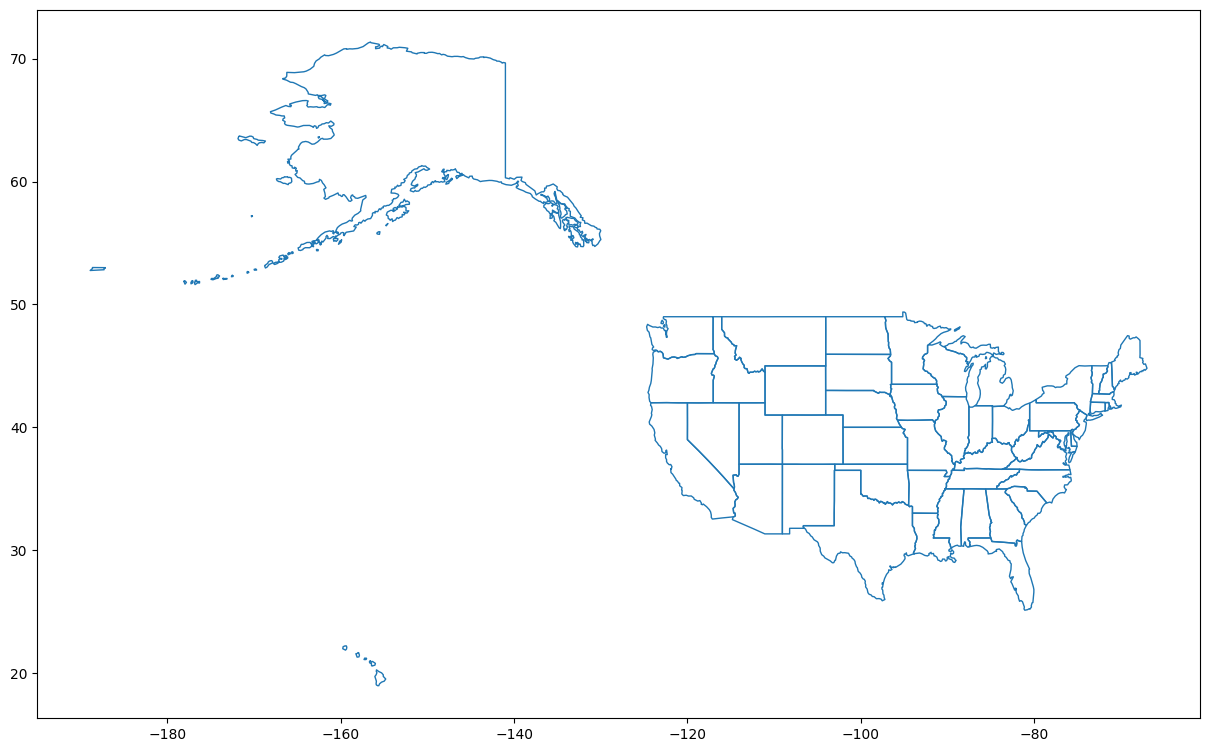

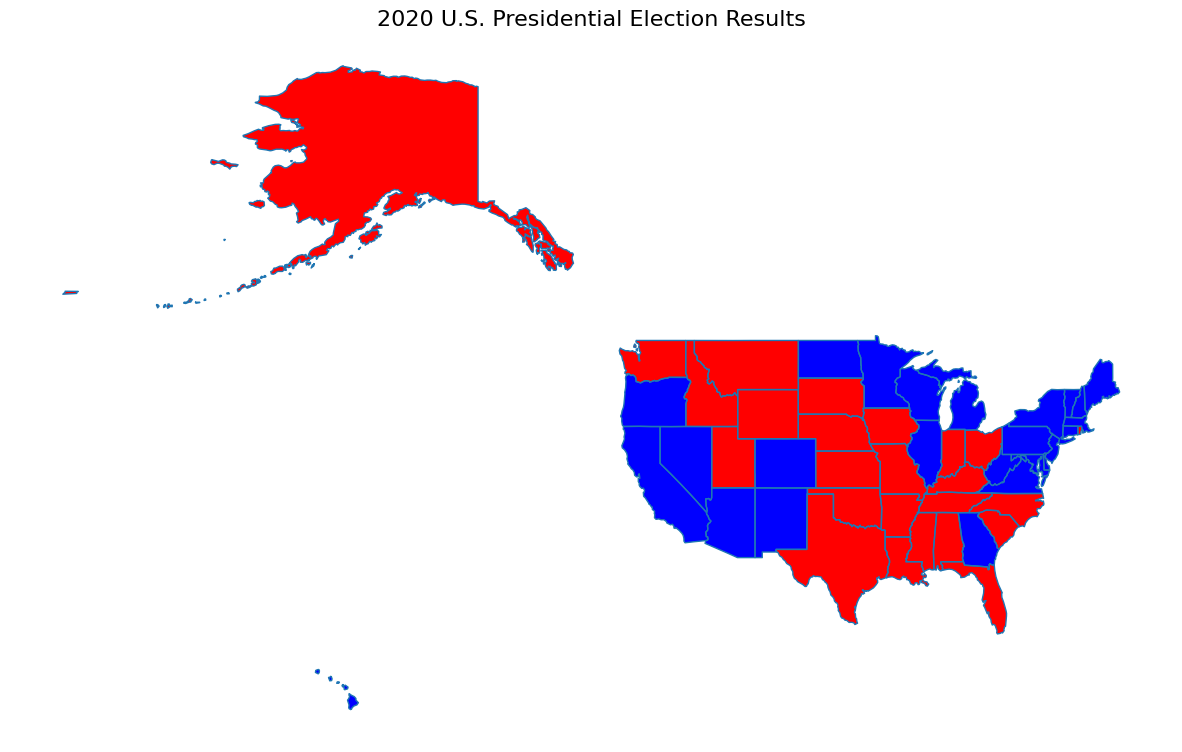

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file for U.S. state boundaries
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
usa_map = gpd.read_file(geojson_url)

# Example election data
state_classification = pd.DataFrame({'STATE': states, 'Party': parties})

# Merge geographical data with election data
usa_map = usa_map.merge(state_classification, left_on='name', right_on='STATE')

# Assign colors for parties
color_mapping = {'D': 'blue', 'R': 'red'}
usa_map['color'] = usa_map['Party'].map(color_mapping)

# Plot the U.S. map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa_map.boundary.plot(ax=ax, linewidth=1)

# Check for missing values in the 'color' column
print(usa_map['color'].isna().sum())

# Fill missing values in the 'color' column with 'gray'
usa_map['color'] = usa_map['color'].fillna('gray')

# Validate the column
print(usa_map[['name', 'color']].head())

# Plot the U.S. map again with corrected colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa_map.boundary.plot(ax=ax, linewidth=1)
usa_map.plot(ax=ax, color=usa_map['color'])

# Add title
plt.title('2020 U.S. Presidential Election Results', fontsize=16)
plt.axis('off')  # Turn off axes
plt.show()
